In [82]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])




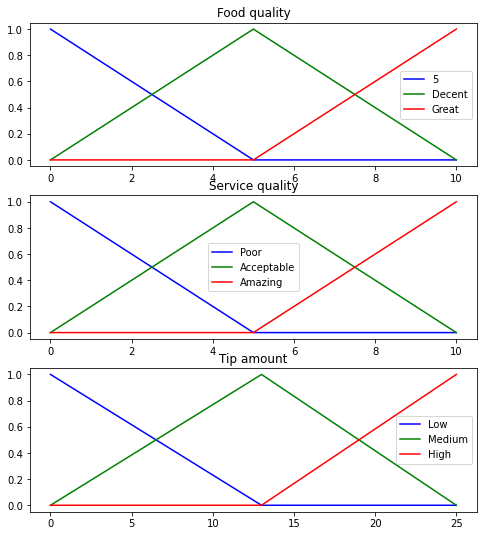

In [83]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='5')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

In [84]:
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [85]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

In [86]:


# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

Text(0.5, 1.0, 'Output membership activity')

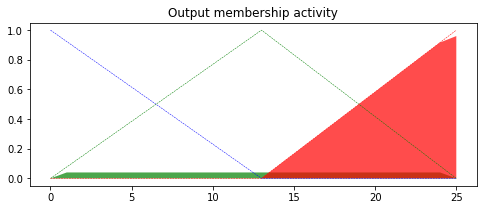

In [87]:


# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')



In [88]:
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

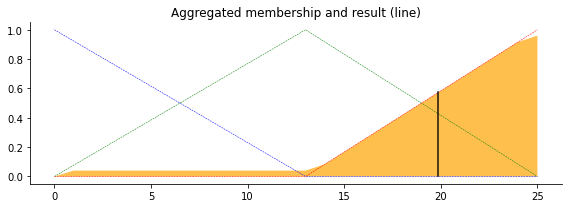

In [89]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [90]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


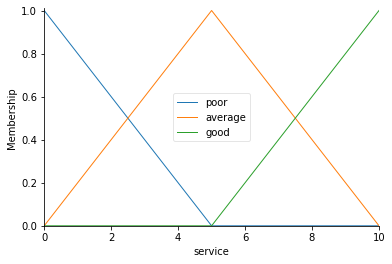

In [91]:
service.view()

C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


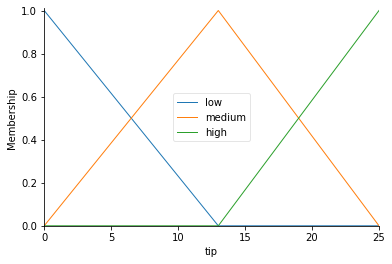

In [92]:
tip.view()

C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\CLARK\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


21.0


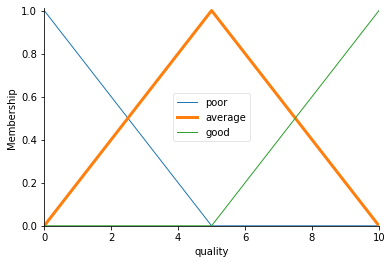

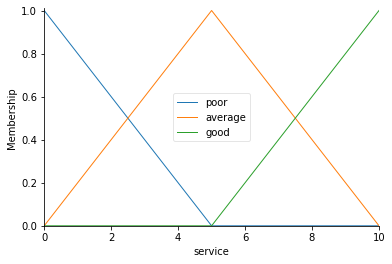

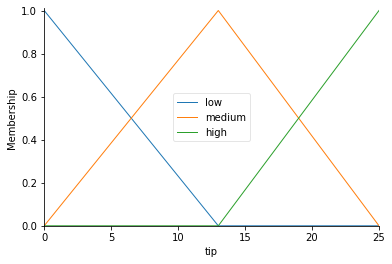

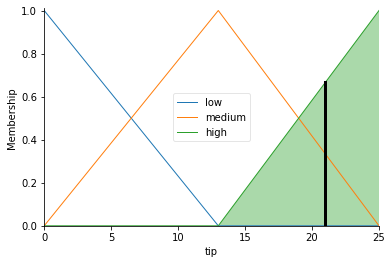

In [99]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
quality['average'].view()
service.view()
tip.view()

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])



tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] =10
tipping.input['service'] =10

# Crunch the numbers
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

# _Workplace Productivity_

## <font color = yellow> _Situation/problem:_ </font>
In a work environment, individual performance may result into a huge impact and can contribute to the overall result of a project. When certain individual excels at his works, these individuals should be recognize and be sufficiently incentives, this would also show that these certain individuals had done good and should be an example. On the other end of the spectrum, underperforming individuals should be given attention and be dealt with properly.

In this fuzzy logic program, it would allow us to see how much of an individual is underperforming or exceling by using linguistic variable and fuzzifying it to be able to accurately determine how bad or how good certain variables are. By using this we are able to have a more accurate idea of whats happening and depending on the result we are also able to give certain individuals the right amount of incentives,attention and actions.


Project members/employees are often given tasks that can be in a varied of difficulties and these may be expressed in easy, normal, hard, but these are vaguely represented, like how hard or how easy it is to complete certain task. Following the completion of task is the fruition of an output which may also be varied in results and may be represented in one way or form like unsatisfactory,satisfactory,very satisfactory. Another thing to consider  is that the amount of importance the certain task is, this can be small, expected and huge. With all of these information we may be able to come up with an accurate incentive to an individual.

## <font color = yellow> _Under what circumstances can we apply this fuzzy logic program?_ </font>
We can be able to better evaluate the performance of employees or project members, this would allows us to be able to monitor who are performing better and in the process incentivicing them accurately based on their performance or in some cases help them improve their performances for future

## <font color = yellow> _Another thing to consider:_ </font>
This implementation of fuzzy logic to the workp productivity/performance leans more towards the result of task since we are talking about productivity, or the quality of the task over the time and resources used up (time was not included since it is quantifiable and not considered to be a fuzzy, since it is defined as quantifying and reasoning out imprecise or vague terms, however time can be precise(ie. 1hr,20sec, 10days 10hrs 20mins 20sec 20msec)) and are usually accurately defined in a lot of scenario. An example woud be:


### difficulty->results->impact=incentive

<br>normal->unsatisfactory->expected = small
<br>normal->satisfactory->expected = normal
<br>normal->very satisfactory->expected = normal





<br><font color = yellow> Difficulty of task - </font> easy, normal, hard                3 6 9


<br><font color = yellow> Result of task - </font>  unsatisfactory, satisfactory, very satisfactory       6 12 18


<br><font color = yellow> Importance of task - </font>  small, expected, huge          3 6 9















In [ ]:
# outcome: 

# Incentive

# rules:

# Difficulty of task  |     Results         |       Impact      |       Incentive
#------------------------------------------------------------------------------------
# easy                |  unsatisfactory     |       small       |         small
# easy                |  satisfactory       |       small       |         small
# easy                |  very satisfactory  |       small       |         normal
# normal              |  unsatisfactory     |       small       |         small
# normal              |  satisfactory       |       small       |         small
# normal              |  very satisfactory  |       small       |         normal
# hard                |  unsatisfactory     |       small       |         small
# hard                |  satisfactory       |       small       |         normal
# hard                |  very satisfactory  |       small       |         normal
# easy                |  unsatisfactory     |      expected     |         small
# easy                |  satisfactory       |      expected     |         small
# easy                |  very satisfactory  |      expected     |         normal
# normal              |  unsatisfactory     |      expected     |         small 
# normal              |  satisfactory       |      expected     |         normal
# normal              |  very satisfactory  |      expected     |         normal
# hard                |  unsatisfactory     |      expected     |         small
# hard                |  satisfactory       |      expected     |         normal
# hard                |  very satisfactory  |      expected     |         normal
# easy                |  unsatisfactory     |        huge       |         small
# easy                |  satisfactory       |        huge       |         normal
# easy                |  very satisfactory  |        huge       |         normal
# normal              |  unsatisfactory     |        huge       |         small
# normal              |  satisfactory       |        huge       |         normal
# normal              |  very satisfactory  |        huge       |         normal
# hard                |  unsatisfactory     |        huge       |         small
# hard                |  satisfactory       |        huge       |         normal
# hard                |  very satisfactory  |        huge       |         huge 

In [ ]:


incentive = ctrl.Consequent(np.arange(0, 101, 1), 'incentive')

incentive['small'] = fuzz.trimf(incentive.universe, [0, 0, 50])
incentive['normal'] = fuzz.trimf(incentive.universe, [0, 50, 100])
incentive['huge'] = fuzz.trimf(incentive.universe, [50, 100, 100])

incentive.view()
time = ctrl.Antecedent(np.arange(0, 141, 1), 'time')

time['short'] = fuzz.trimf(time.universe, [0, 30, 50])
time['moderate'] = fuzz.trimf(time.universe, [35, 60, 80])
time['long'] = fuzz.trimf(time.universe, [65, 90, 110])
time['very long'] = fuzz.trapmf(time.universe, [100,120,150, 150])

time.view()

difficulty = ctrl.Antecedent(np.arange(0, 101, 5), 'difficulty')

difficulty['easy'] = fuzz.trimf(difficulty.universe, [0, 0, 50])
difficulty['normal'] = fuzz.trimf(difficulty.universe, [0, 50, 100])
difficulty['hard'] = fuzz.trimf(difficulty.universe, [50, 100, 100])

difficulty.view()

result = ctrl.Antecedent(np.arange(0, 101, 5), 'result')

result['satisfactory'] = fuzz.trimf(result.universe, [0, 0, 50])
result['unsatisfactory'] = fuzz.trimf(result.universe, [0, 50, 100])
result['very satisfactory'] = fuzz.trimf(result.universe, [50, 100, 100])


result.view()


importance = ctrl.Antecedent(np.arange(0, 101, 5), 'importance')

importance['small'] = fuzz.trimf(importance.universe, [0, 0, 50])
importance['expected'] = fuzz.trimf(importance.universe, [0, 50, 100])
importance['huge'] = fuzz.trimf(importance.universe, [50, 100, 100])

importance.view()

rule1 = ctrl.Rule(difficulty['easy'] & result['unsatisfactory'] & importance['small'], incentive['small'])
rule2 = ctrl.Rule(difficulty['easy'] & result['satisfactory'] & importance['small'], incentive['small'])
rule3 = ctrl.Rule(difficulty['easy'] & result['satisfactory'] & importance['small'], incentive['normal'])
rule4 = ctrl.Rule(difficulty['normal'] & result['unsatisfactory'] & importance['small'], incentive['small'])
rule5 = ctrl.Rule(difficulty['normal'] & result['satisfactory'] & importance['small'], incentive['small'])
rule6 = ctrl.Rule(difficulty['normal'] & result['very satisfactory'] & importance['small'], incentive['normal'])
rule7 = ctrl.Rule(difficulty['hard'] & result['unsatisfactory'] & importance['small'], incentive['small'])
rule8 = ctrl.Rule(difficulty['hard'] & result['satisfactory'] & importance['small'], incentive['normal'])
rule9 = ctrl.Rule(difficulty['hard'] & result['very satisfactory'] & importance['small'], incentive['normal'])
rule10 = ctrl.Rule(difficulty['easy'] & result['unsatisfactory'] & importance['expected'], incentive['small'])
rule11 = ctrl.Rule(difficulty['easy'] & result['satisfactory'] & importance['expected'], incentive['small'])
rule12 = ctrl.Rule(difficulty['easy'] & result['very satisfactory'] & importance['expected'], incentive['normal'])
rule13 = ctrl.Rule(difficulty['normal'] & result['unsatisfactory'] & importance['expected'], incentive['small'])
rule14 = ctrl.Rule(difficulty['normal'] & result['satisfactory'] & importance['expected'], incentive['normal'])
rule15 = ctrl.Rule(difficulty['normal'] & result['very satisfactory'] & importance['expected'], incentive['normal'])
rule16 = ctrl.Rule(difficulty['hard'] & result['unsatisfactory'] & importance['expected'], incentive['small'])
rule17 = ctrl.Rule(difficulty['hard'] & result['satisfactory'] & importance['expected'], incentive['normal'])
rule18 = ctrl.Rule(difficulty['hard'] & result['very satisfactory'] & importance['expected'], incentive['normal'])
rule19 = ctrl.Rule(difficulty['easy'] & result['unsatisfactory'] & importance['huge'], incentive['small'])
rule20 = ctrl.Rule(difficulty['easy'] & result['satisfactory'] & importance['huge'], incentive['normal'])
rule21 = ctrl.Rule(difficulty['easy'] & result['very satisfactory'] & importance['huge'], incentive['normal'])
rule22 = ctrl.Rule(difficulty['normal'] & result['unsatisfactory'] & importance['huge'], incentive['small'])
rule23 = ctrl.Rule(difficulty['normal'] & result['satisfactory'] & importance['huge'], incentive['normal'])
rule24 = ctrl.Rule(difficulty['normal'] & result['very satisfactory'] & importance['huge'], incentive['normal'])
rule25 = ctrl.Rule(difficulty['hard'] & result['unsatisfactory'] & importance['huge'], incentive['small'])
rule26 = ctrl.Rule(difficulty['hard'] & result['satisfactory'] & importance['huge'], incentive['normal'])
rule27 = ctrl.Rule(difficulty['hard'] & result['very satisfactory'] & importance['huge'], incentive['huge'])

incentive_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12
,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])

incentivess = ctrl.ControlSystemSimulation(incentive_ctrl)

#diificulty -> hard
#result -> very satifactory
#importance -> huge
incentivess.input['difficulty'] = 20
incentivess.input['result'] = 20
incentivess.input['importance'] =20

#diificulty -> hard
#result -> very satifactory
#importance -> huge
incentivess.input['difficulty'] = 20
incentivess.input['result'] = 20
incentivess.input['importance'] =20

incentivess.compute()
print(incentivess.output['incentive'])
incentive.view(sim=incentivess)

#diificulty -> hard
#result -> very satifactory
#importance -> huge
incentivess.input['difficulty'] = 20
incentivess.input['result'] = 20
incentivess.input['importance'] =20

#diificulty -> hard
#result -> very satifactory
#importance -> huge
incentivess.input['difficulty'] = 20
incentivess.input['result'] = 20
incentivess.input['importance'] =20

incentivess.compute()
print(incentivess.output['incentive'])
incentive.view(sim=incentivess)

